<a href="https://colab.research.google.com/github/VeerVikramSingh/EDA-practice/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis

Understand the data by EDA and derive simple models with Pandas as baseline.

EDA ia a critical and first step in analyzing the data and we do this for below reasons :

Finding patterns in Data

Determining relationships in Data

Checking of assumptions

Preliminary selection of appropriate models

Detection of mistakes

Some Background Information:

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.

The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description

The sinking of the RMS Titanic in the early morning of 15 April 1912, four days into the ship's maiden voyage from Southampton to New York City, was one of the deadliest peacetime maritime disasters in history, killing more than 1,500 people. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg in the North Atlantic. The ship had received six warnings of sea ice but was travelling at near maximum speed when the lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled the starboard (right) side and opened five of sixteen compartments to the sea. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the International Convention for the Safety of Life at Sea (1914), which continues to govern maritime safety.

In [0]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
sns.set()
from subprocess import check_output

In [3]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Profiling:

In the upcoming sections we will first understand our dataset using various pandas functionalities.

Then with the help of pandas profiling we will find which columns of our dataset need preprocessing.

In preprocessing we will deal with erronous and missing values of columns.
Again we will do pandas profiling to see how preprocessing have transformed our dataset.

In [6]:
print(titanic_data.shape)
print(titanic_data.columns)
print(titanic_data.tail())

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Pre Profiling:

By pandas profiling, an interactive HTML report gets generated which contins all the information about the columns of the dataset, like the counts and type of each column. 

Detailed information about each column, coorelation between different columns and a sample of dataset.

It gives us visual interpretation of each column in the data.
Spread of the data can be better understood by the distribution plot.
Grannular level analysis of each column.

In [8]:
import pandas_profiling
profile=pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile="titanic_preprocess.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode(),inplace=True)

In [0]:
titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)

In [0]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [0]:
titanic_data["Fare"].replace(0,titanic_data["Fare"].median(),inplace=True)

In [0]:
titanic_data["Family_Size"]=titanic_data["SibSp"]+titanic_data["Parch"]

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Family_Size    891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [0]:
titanic_data["Gender_Class"]=titanic_data.apply(lambda x:"child" if x["Age"]<15 else x["Sex"],axis=1)

In [19]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile="titanic_after_preprocessing.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named FamilySize.

 So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e titanic_after_preprocessing.html and titanic_before_preprocessing.html.


In titanic_after_preprocessing.html report, observations:

In the Dataset info, Total Missing(%) = 0.0%
Number of variables = 13
Observe the newly created variable FamilySize, Click on Toggle details to get more detailed information about it

In [20]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


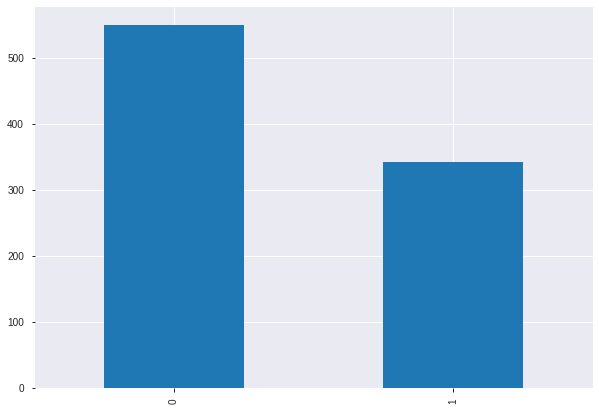

In [22]:
titanic_data["Survived"].value_counts().plot.bar(figsize=(10,7),fontsize=10)

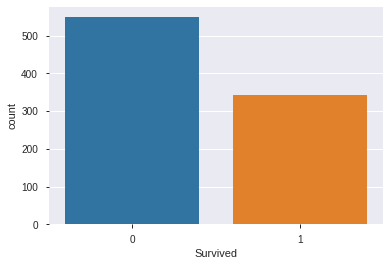

In [23]:
sns.countplot(x="Survived",data=titanic_data)

In [24]:
titanic_data.groupby(["Survived"])["Survived"].value_counts()

Survived  Survived
0         0           549
1         1           342
Name: Survived, dtype: int64

In [25]:
titanic_data.groupby(["Survived"])["Gender_Class"].value_counts()

Survived  Gender_Class
0         male            450
          female           66
          child            33
1         female          209
          male             88
          child            45
Name: Gender_Class, dtype: int64

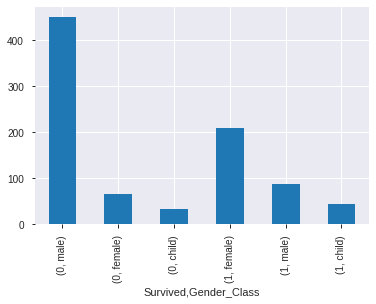

In [26]:
titanic_data.groupby(["Survived"])["Gender_Class"].value_counts().plot.bar()

In [27]:
titanic_data.groupby(["Survived","Gender_Class"])["Survived"].value_counts()

Survived  Gender_Class  Survived
0         child         0            33
          female        0            66
          male          0           450
1         child         1            45
          female        1           209
          male          1            88
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


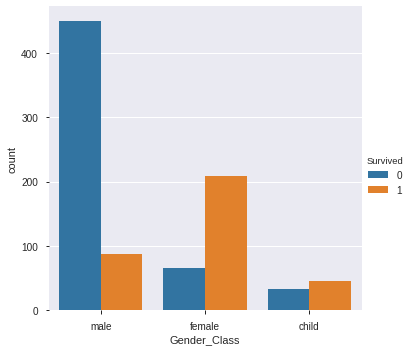

In [28]:
sns.factorplot("Gender_Class",hue="Survived",data=titanic_data,kind="count")

In [29]:
(titanic_data[titanic_data["Gender_Class"]=="male"]["Survived"].sum()/titanic_data[titanic_data["Gender_Class"]=="male"]["Survived"].count())*100

16.356877323420075

In [30]:
print((titanic_data[titanic_data["Gender_Class"]=="female"]["Survived"].sum()/titanic_data[titanic_data["Gender_Class"]=="female"]["Survived"].count())*100)
(titanic_data[titanic_data["Gender_Class"]=="child"]["Survived"].sum()/titanic_data[titanic_data["Gender_Class"]=="child"]["Survived"].count())*100

76.0


57.692307692307686

Text(0.5, 1.0, 'Survived (child)')

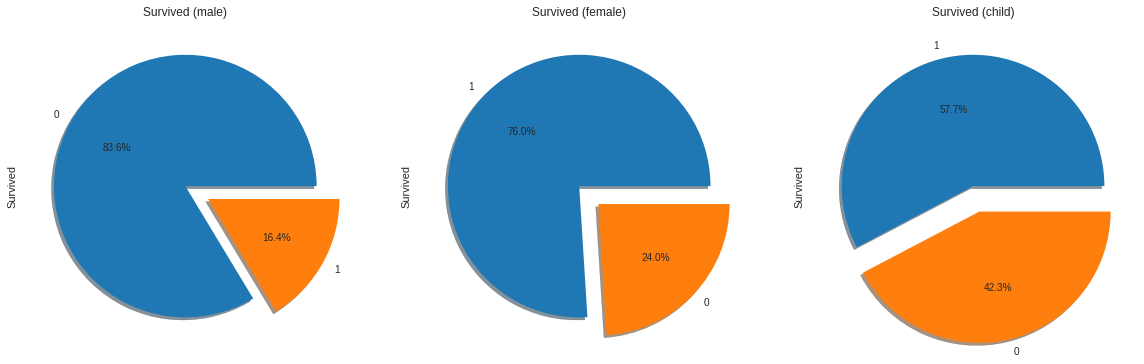

In [31]:
f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['Gender_Class'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic_data['Survived'][titanic_data['Gender_Class'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
titanic_data['Survived'][titanic_data['Gender_Class'] == 'child'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')

In [32]:
(titanic_data.Survived==0).sum()

549

In [33]:
titanic_data.groupby(["Survived"])["Gender_Class"].value_counts()

Survived  Gender_Class
0         male            450
          female           66
          child            33
1         female          209
          male             88
          child            45
Name: Gender_Class, dtype: int64

In [0]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

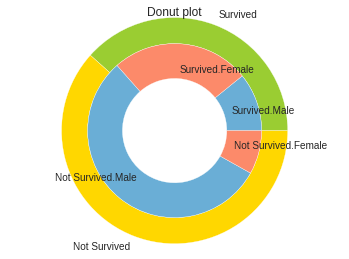

In [35]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Survived', 'Not Survived']
group_size=[342,549]
subgroup_names=['Survived.Male','Survived.Female','Not Survived.Male','Not Survived.Female']
subgroup_size=[88,209,450,66]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()

What is the rate of survival of males, females and child on the basis of Passenger Class?

In [36]:
titanic_data.groupby([titanic_data["Gender_Class"],"Pclass"])["Survived"].value_counts()

Gender_Class  Pclass  Survived
child         1       1             4
                      0             1
              2       1            19
              3       0            32
                      1            22
female        1       1            90
                      0             2
              2       1            60
                      0             6
              3       1            59
                      0            58
male          1       0            77
                      1            42
              2       0            91
                      1             8
              3       0           282
                      1            38
Name: Survived, dtype: int64

In [37]:
titanic_data.Survived[titanic_data.Pclass == 1].sum()/titanic_data[titanic_data.Pclass == 1].Survived.count()

0.6296296296296297

In [0]:
a=titanic_data.Survived[titanic_data.Pclass==1].count()

In [0]:
b=titanic_data.Survived[titanic_data.Pclass==1].sum()

In [40]:
b/a

0.6296296296296297

In [41]:
(titanic_data.Survived[titanic_data.Pclass==1].sum()/titanic_data.Survived[titanic_data.Pclass==1].count())

0.6296296296296297

In [42]:
print((titanic_data.Survived[titanic_data.Pclass==2].sum()/titanic_data.Survived[titanic_data.Pclass==2].count()))
print((titanic_data.Survived[titanic_data.Pclass==3].sum()/titanic_data.Survived[titanic_data.Pclass==3].count()))

0.47282608695652173
0.24236252545824846


In [43]:
pd.crosstab([titanic_data.Gender_Class, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

In [44]:
pd.crosstab([titanic_data.Gender_Class,titanic_data.Survived],titanic_data.Pclass)

Pclass                  1   2    3
Gender_Class Survived             
child        0          1   0   32
             1          4  19   22
female       0          2   6   58
             1         90  60   59
male         0         77  91  282
             1         42   8   38

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in.

 Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of plotting.

Using violin plot to see the relationship between Pclass and Survived

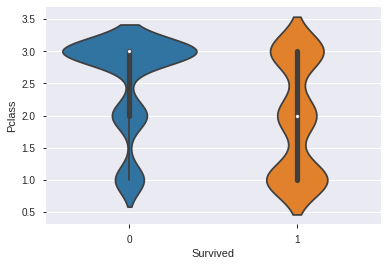

In [45]:
sns.violinplot("Survived","Pclass",data=titanic_data)

Above is another beautiful way to see how the survival rate is varying with Passenger class.

Pclass 3 have more people who died, and for Pclass 1 survival rate is more.

Drawing factorplot to look at the distribution of popluation with Pclass and GenderClass.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


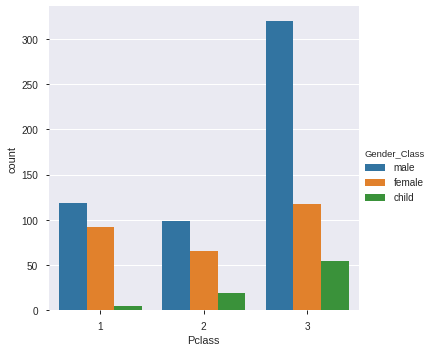

In [46]:
sns.factorplot("Pclass",hue="Gender_Class",data=titanic_data,kind="count")

Pclass 3 have maximum number of males

Pclass 1 have minimum number of children.

using factorplot to see the variation of surviavl rate with Pclass and GenderClass.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


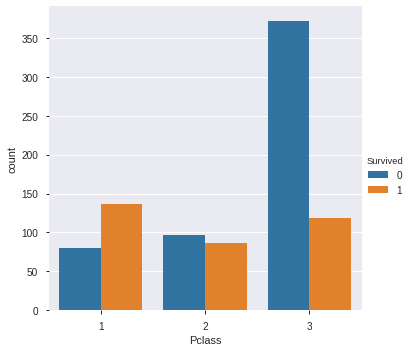

In [47]:
sns.factorplot("Pclass",hue="Survived",kind="count",data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


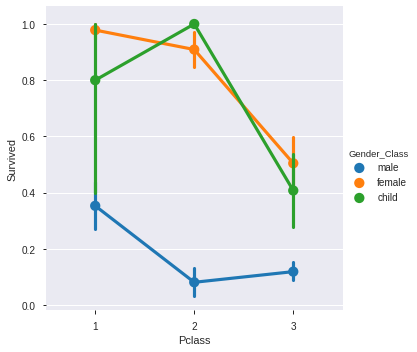

In [48]:
sns.factorplot("Pclass","Survived",hue="Gender_Class",data=titanic_data)

The above graph shows:

the survival rate for male is very low irrespective of the class he belongs to.

And, the survival rate is less for all the 3rd class passengers.

Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

What is the survival rate considering the Embarked variable?

In [49]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        889 non-null object
Family_Size     891 non-null int64
Gender_Class    891 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


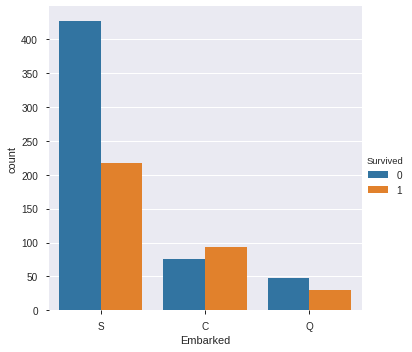

In [50]:
sns.factorplot("Embarked",hue="Survived",data=titanic_data,kind="count")

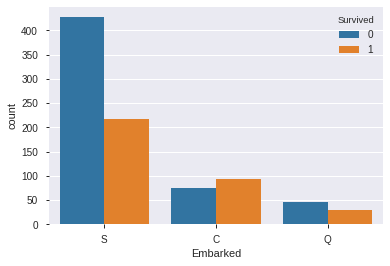

In [51]:
sns.countplot("Embarked",hue="Survived",data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


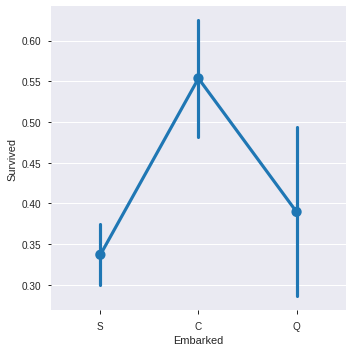

In [52]:
sns.factorplot("Embarked","Survived",kind="point",data=titanic_data)

Maximum_ number of people have Southampton as port of embarkment.

Also observe people who boarded at Cherbourg, more people survived than died, and this is reverse for Queenstown.

Survival rate - Comparing Embarked and Sex.¶


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


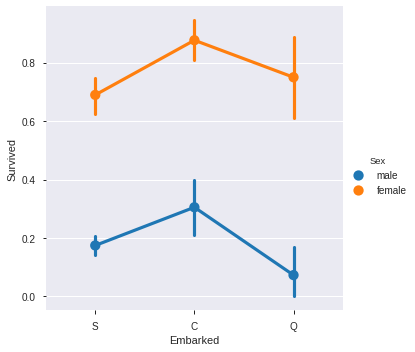

In [53]:
sns.factorplot("Embarked","Survived",hue="Sex",data=titanic_data)

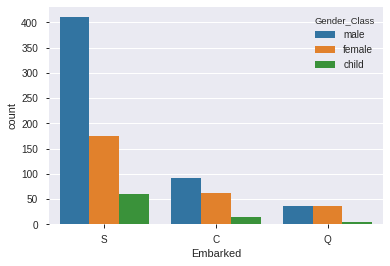

In [54]:
sns.countplot('Embarked',data=titanic_data, hue='Gender_Class')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


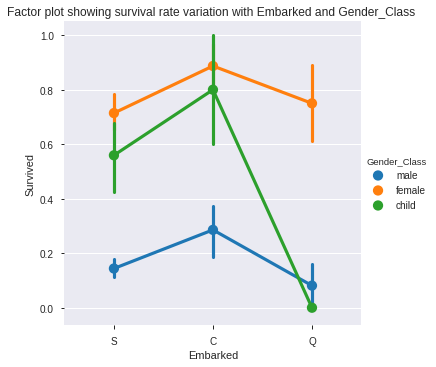

In [55]:
sns.factorplot('Embarked','Survived', hue= 'Gender_Class', kind='point', data= titanic_data)
plt.title('Factor plot showing survival rate variation with Embarked and Gender_Class ')
plt.show()

Chances of survival of females who boarded from C is highest.
Chances of survival of males boarding from Q is lowest

How survival rate vary with Embarked, Sex and Pclass

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


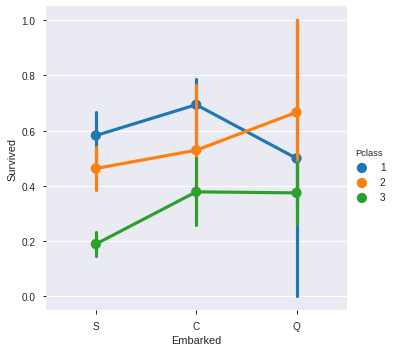

In [60]:
sns.factorplot("Embarked","Survived",hue="Pclass",data=titanic_data)

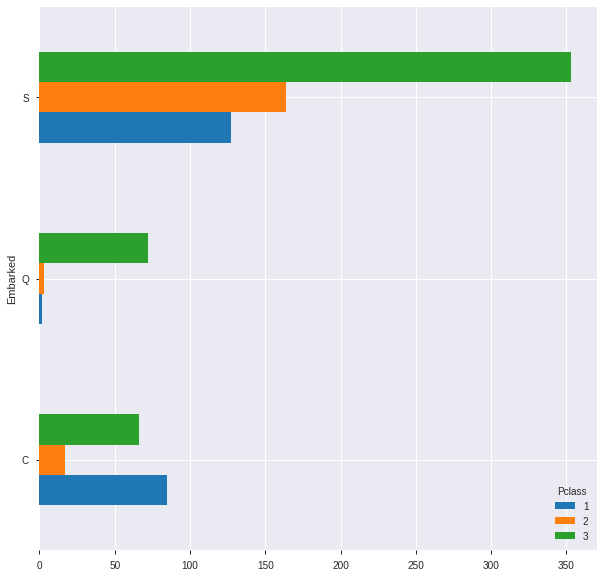

In [63]:
relation=pd.crosstab(titanic_data.Embarked,titanic_data.Pclass)
relation.plot.barh(figsize=(10,10))

Maximum people who boarded from S__ belongs to __Pclass 3.


Most of the passengers belonging to Pclass 1 boarded from C and S

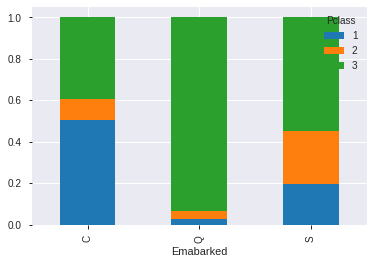

In [64]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Emabarked')

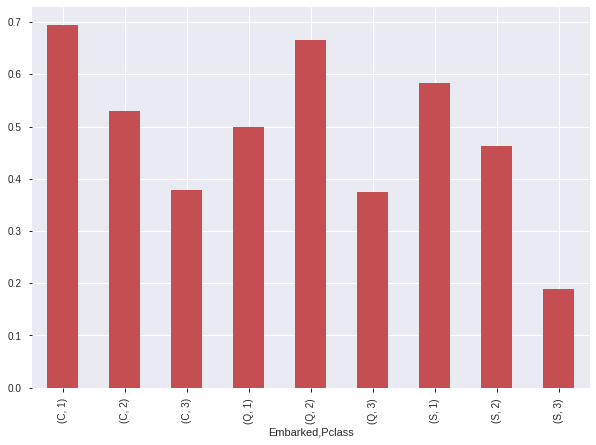

In [67]:
titanic_data.groupby(["Embarked","Pclass"])["Survived"].mean().plot.bar(figsize=(10,7),color="r")


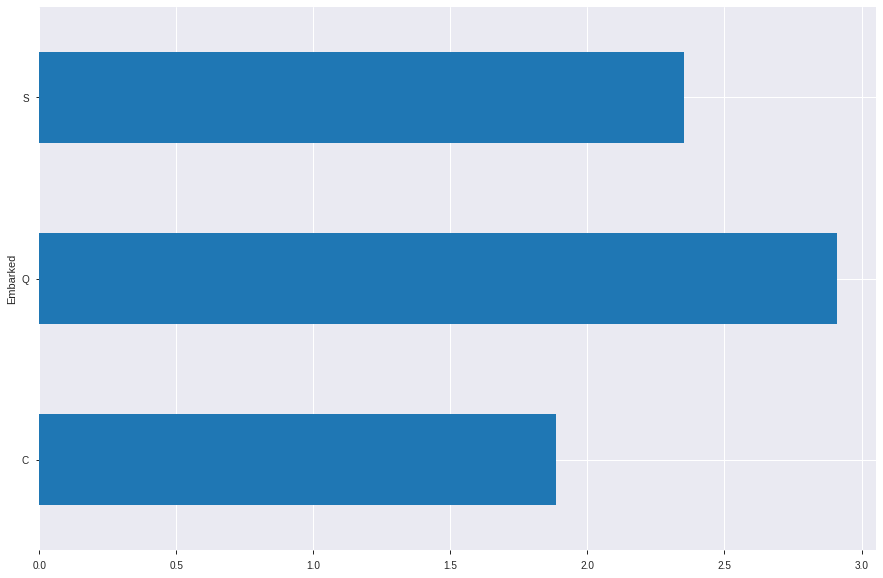

In [72]:
titanic_data.groupby(["Embarked"])["Pclass"].mean().plot.barh(figsize=(15,10))

In [75]:
titanic_data.groupby(["Embarked"])["Pclass"==1].mean().plot.bar(figsize=(10,7))

KeyError: ignored

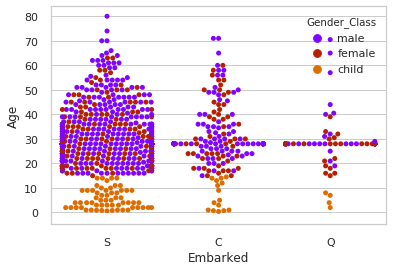

In [77]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="Embarked", y="Age", hue="Gender_Class", palette="gnuplot", data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


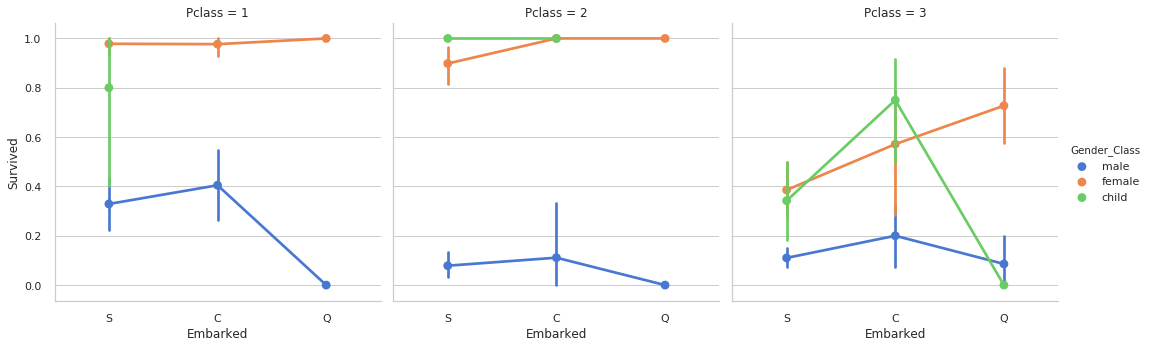

In [82]:
sns.factorplot("Embarked","Survived",col="Pclass",hue="Gender_Class",data=titanic_data,kind="point")

Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived_.

All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2.

For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

In [83]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        889 non-null object
Family_Size     891 non-null int64
Gender_Class    891 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


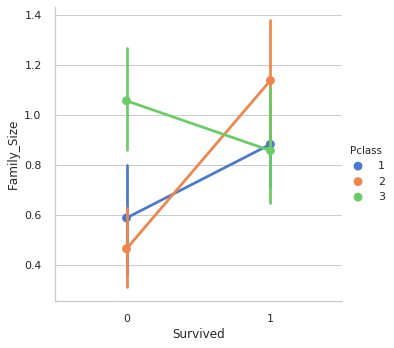

In [84]:
sns.factorplot("Survived","Family_Size",hue="Pclass",data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


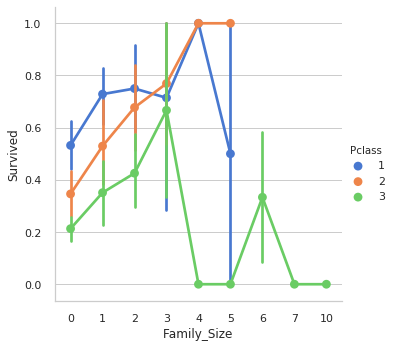

In [86]:
sns.factorplot("Family_Size","Survived",hue="Pclass",data=titanic_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Survival by Total Family Size')

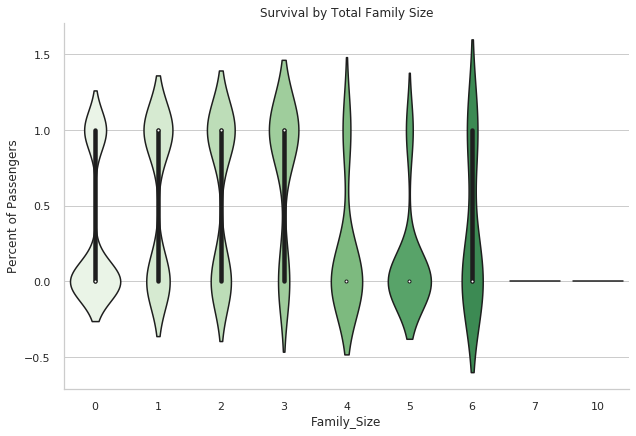

In [88]:
ax = sns.factorplot(x='Family_Size', y='Survived', data=titanic_data, kind='violin', aspect=1.5, size=6, palette="Greens")
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Total Family Size')

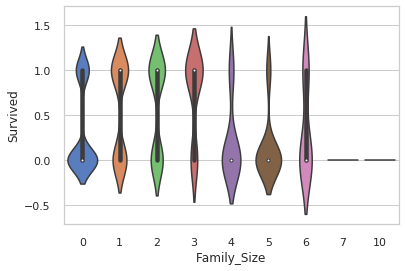

In [89]:
sns.violinplot("Family_Size","Survived",data=titanic_data)

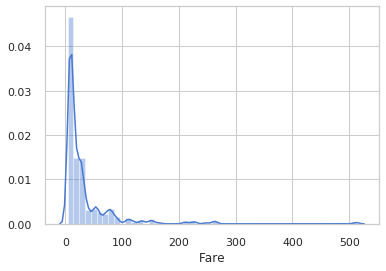

In [93]:
sns.distplot(titanic_data.Fare)

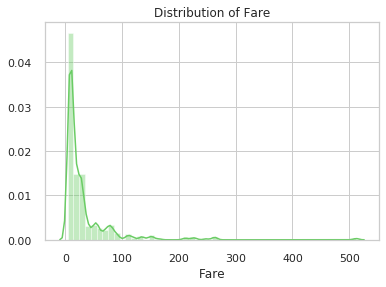

In [94]:
sns.distplot(titanic_data['Fare'],color ='g')
plt.title('Distribution of Fare')
plt.show()

Pclass  Fare   
1       5.0000     AxesSubplot(0.125,0.125;0.775x0.755)
        14.4542    AxesSubplot(0.125,0.125;0.775x0.755)
        25.5875    AxesSubplot(0.125,0.125;0.775x0.755)
        25.9250    AxesSubplot(0.125,0.125;0.775x0.755)
        25.9292    AxesSubplot(0.125,0.125;0.775x0.755)
                                   ...                 
3       34.3750    AxesSubplot(0.125,0.125;0.775x0.755)
        39.6875    AxesSubplot(0.125,0.125;0.775x0.755)
        46.9000    AxesSubplot(0.125,0.125;0.775x0.755)
        56.4958    AxesSubplot(0.125,0.125;0.775x0.755)
        69.5500    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, Length: 254, dtype: object

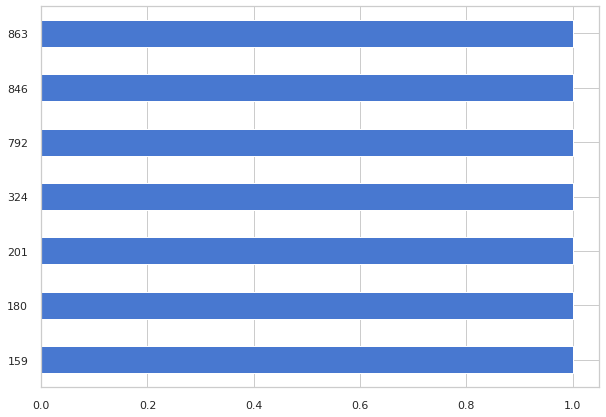

In [96]:
titanic_data.groupby(["Pclass","Fare"])["Survived"].plot.barh(figsize=(10,7))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


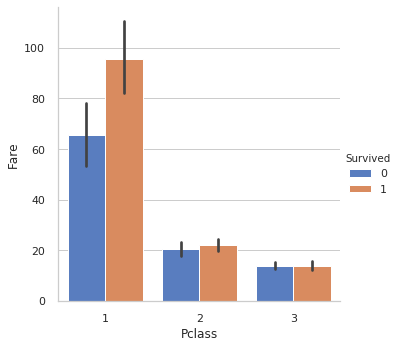

In [98]:
sns.factorplot("Pclass","Fare",hue="Survived",data=titanic_data,kind="bar")

In [0]:
import matplotlib.pyplot as plt


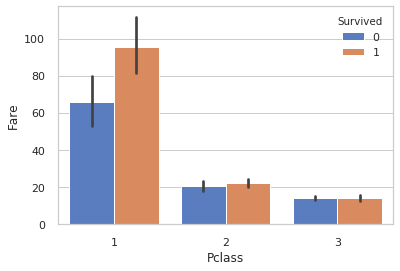

In [104]:
sns.barplot(x="Pclass",y="Fare",hue="Survived",data=titanic_data)


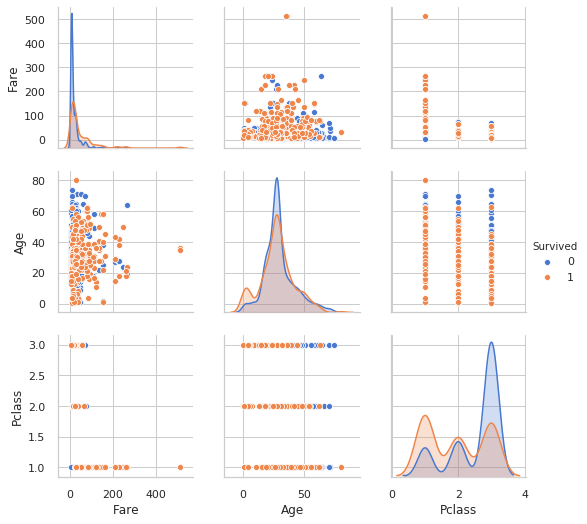

In [107]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars=titanic_data[["Fare","Age","Pclass"]],hue="Survived")

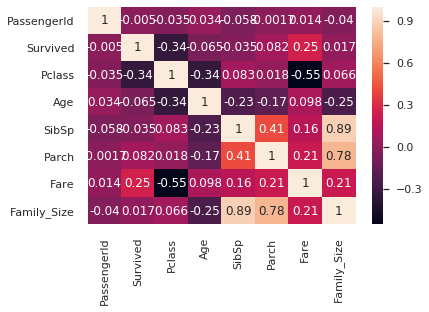

In [108]:
sns.heatmap(titanic_data.corr(),annot=True)

Age and Pclass are negatively corelated with Survived.

FamilySize is made from Parch and SibSb only therefore high positive corelation among them.

Fare and FamilySize are positively coorelated with Survived.
With high corelation we face redundancy issues.

Hypothesis: Women and children are more likely to survive¶
 
 we observed that an overwhelming percentage of women & children have survived the titanic clash.

76% of females survived.

57% of children also survived.

Only 16% of males survived.

Also the survival rate for male is very low irrespective of the class he belongs to and the survival rate is less for all the 3rd class passengers. Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

Conclusion
With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.

Also we have seen making use of packages like matplotlib and seaborn to develop better insights about the data.

We have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. We also learnt how to create new features which will in turn help us to better predict the survival.

We also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.

We have seen the impact of columns like Age, Embarked, Fare, SibSp and Parch on the rate of survival.

The most important inference drawn from all this analysis is, we get to know what are the features on which survival is highly positively and negatively coorelated with.
This analysis will help us to choose which machine learning model we can apply to predict survival of test dataset.

In [109]:
titanic_data.groupby(["Gender_Class"])["Survived"].value_counts()

Gender_Class  Survived
child         1            45
              0            33
female        1           209
              0            66
male          0           450
              1            88
Name: Survived, dtype: int64

In [0]:
a=titanic_data[titanic_data["Gender_Class"]=="male"]["Survived"].sum()

In [0]:
b=titanic_data[titanic_data["Gender_Class"]=="male"]["Survived"].count()

In [123]:
a/b


0.16356877323420074